This Jupyter Notebook include some basic data analysis and visualizations of WHO data on COVID-19 which caused a global pandemic in 2020

contact: 🐦twitter@smirshekari

# Import Libraries

In [1]:
import os
os.system('cd ~/git_repos/mavad/covid-19-data')
os.system('git pull')

0

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
import matplotlib.ticker as mtick
from random import sample 
import datetime
from pandas.plotting import register_matplotlib_converters
from labellines import *
import sys

register_matplotlib_converters()

C:\Users\saeed\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import Data

In [3]:
corona_us_states   = pd.read_csv('/home/smirs/git_repos/mavad/covid-19-data/us-states.csv')
corona_us_counties = pd.read_csv('/home/smirs/git_repos/mavad/covid-19-data/us-counties.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/home/smirs/git_repos/mavad/covid-19-data/us-states.csv'

In [4]:
corona_us_counties

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
78543,2020-04-21,Sublette,Wyoming,56035.0,1,0
78544,2020-04-21,Sweetwater,Wyoming,56037.0,10,0
78545,2020-04-21,Teton,Wyoming,56039.0,62,0
78546,2020-04-21,Uinta,Wyoming,56041.0,6,0


In [5]:
corona_us_states.state.unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands',
       'American Samoa'], dtype=object)

# Deta Cleaning/Reshaping

In [6]:
data_frames = corona_us_states

data_frames['date'] = data_frames['date'].astype('datetime64[ns]') 

# make a target list of countries for plotting
# state_list = ['Missouri', 'Illinois', 'California', 'New York', 
#        'Washington', 'Arizona', 'Massachusetts',
#        'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
#        'Rhode Island', 'Georgia', 'New Hampshire',
#        'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
#        'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
#        'Oklahoma', 'Pennsylvania', 'South Carolina',
#        'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
#        'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
#        'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
#        'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
#        'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
#        'Guam', 'West Virginia', 'Northern Mariana Islands']

state_list = ['Missouri', 'Illinois', 'California', 'New York', 'New Jersey', 'Washington', 'Florida', 'Louisiana', 'Michigan'] #, 'Iowa', 'Arizona','Connecticut']

population_dic = {'Alabama':4908621, 'Alaska':734002, 'Arizona':7378494, 'Arkansas':3038999, 
                  'California':39937489, 'Colorado':5845526, 'Connecticut':3563077, 'Delaware':982895, 
                  'District of Columbia':720687, 'Florida':21992985, 'Georgia':10736059, 'Guam':168775, 
                  'Hawaii':1412687, 'Idaho':1826156, 'Illinois':12659682, 'Indiana':6745354, 'Iowa':3179849, 
                  'Kansas':2910357, 'Kentucky':4499692, 'Louisiana':4645184, 'Maine':1345790, 'Maryland':6083116, 
                  'Massachusetts':6976597, 'Michigan':10045029, 'Minnesota':5700671, 'Mississippi':2989260, 
                  'Missouri':6169270, 'Montana':1086759, 'Nebraska':1952570, 'Nevada':3139658, 'New Hampshire':1371246, 
                  'New Jersey':8936574, 'New Mexico':2096640, 'New York':19440469, 'North Carolina':10611862, 
                  'North Dakota':761723, 'Ohio':11747694, 'Oklahoma':3954821, 'Oregon':4301089, 'Pennsylvania':12820878, 
                  'Puerto Rico':3032165, 'Rhode Island':1056161, 'South Carolina':5210095, 'South Dakota':903027, 
                  'Tennessee':6897576, 'Texas':29472295, 'Utah':3282115, 'Vermont':628061, 'Virginia':8626207, 
                  'Virgin Islands':107268, 'Northern Mariana Islands':55144,
                  'Washington':7797095, 'West Virginia':1778070, 'Wisconsin':5851754, 'Wyoming':567025}


# Limit data from the countries from the target country list
data_frames = data_frames.loc[data_frames['state'].isin(state_list)]

len_con = len(data_frames['state'].unique())


# Creating New Insightful Features

In [7]:
def get_yesterday_confirmed(today, mystate):
    '''
    This functions takes today date and a country as inputs and returns the value of confirmed-cases from a day before
    '''
    DD = datetime.timedelta(days=1)
    yesterday = today - DD
    yesterday_str = yesterday.strftime("%Y-%m-%d")
    
    try:
        res = data_frames.loc[(data_frames['state'] == mystate) & (data_frames['date']==yesterday_str)]['cases'].reset_index()['cases'][0]
    except:
        res = 0
    return res

In [8]:
def get_yesterday_dead(today, mystate):
    '''
    This functions takes today date and a country as inputs and returns the value of dead-cases from a day before
    '''
    DD = datetime.timedelta(days=1)
    yesterday = today - DD
    yesterday_str = yesterday.strftime("%Y-%m-%d")
    
    try:
        res = data_frames.loc[(data_frames['state'] == mystate) & (data_frames['date']==yesterday_str)]['deaths'].reset_index()['deaths'][0]
    except:
        res = 0
    return res

In [9]:
def get_population(state):
    '''
    returns the population of the given country
    '''
    return population_dic[state]

In [10]:
# Adding new columns to include yesterday values
data_frames.loc[:,'#yesterday_confirmed'] = data_frames.apply(lambda x: get_yesterday_confirmed(x['date'], x['state']), axis=1)
data_frames.loc[:,'#yesterday_dead'] = data_frames.apply(lambda x: get_yesterday_dead(x['date'], x['state']), axis=1)

# Adding new columns to include daily new values
data_frames.loc[:,'#new_confirmed'] = data_frames['cases'] - data_frames['#yesterday_confirmed']
data_frames.loc[:,'#new_dead'] = data_frames['deaths'] - data_frames['#yesterday_dead']


/home/smirs/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/smirs/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [11]:
# Adding new columns to include other insightful values
data_frames.loc[:,'dead_by_confirmed'] = data_frames['deaths']/data_frames['cases']*100
data_frames.loc[:,'population'] = data_frames.apply(lambda x: get_population(x['state']), axis=1)
data_frames.loc[:,'confirmed_per_capita'] = data_frames['cases']/data_frames['population']
data_frames.loc[:,'death_per_capita'] = data_frames['deaths']/data_frames['population']

data_frames.loc[:,'new_confirmed_per_capita'] = data_frames['#new_confirmed']/data_frames['population']


In [12]:
df = pd.DataFrame(columns=data_frames.columns)
country_list_mod = data_frames['state'].unique()
for country in country_list_mod:
    sub_df = data_frames.loc[(data_frames['state']==country) & (data_frames['cases']>= 50)].reset_index(drop=True)
    #sub_df['Key'] = sub_df.index
    #display(sub_df)
    df = df.append(sub_df, sort=True)
    
df['days_after_threshold'] = df.index    
data_frames_indexed = df
threshold_str = 'Days After 50th Confirmed-Case'

In [13]:
labels_dic = {'days_after_threshold': threshold_str, 'Date':'Date',
              'cases':'Confirmed Cases [Cumulative]',
              'deaths':'Death Cases [Cummulative]',
              'confirmed_minus_recovered&dead': 'Currently Under-Treatment',
              'dead_by_confirmed': 'Mortality Rate (%)',
              'confirmed_per_capita': 'Confirmed Cases Per Capita',
              'death_per_capita': 'Death Cases Per Capita',
              'confirmed_minus_recovered&dead_per_capita':'Currently Under-Treatment Per Capita'
              }

title_note = 'data@JohnHopkins, viz@smirshekari'

last_date = max(data_frames['date'])

In [14]:
data_frames_indexed.sample(10)

,#new_confirmed,#new_dead,#yesterday_confirmed,#yesterday_dead,cases,confirmed_per_capita,date,dead_by_confirmed,death_per_capita,deaths,fips,new_confirmed_per_capita,population,state,days_after_threshold
14,569,18,2746,119,3315,0.000714,2020-03-28,4.132730,2.949291e-05,137,22,0.000122,4645184,Louisiana,14
16,1122,67,6508,197,7630,0.000760,2020-03-31,3.460026,2.628166e-05,264,26,0.000112,10045029,Michigan,16
30,150,2,5517,194,5667,0.000919,2020-04-19,3.458620,3.177037e-05,196,29,0.000024,6169270,Missouri,30
17,355,4,2367,52,2722,0.000441,2020-04-06,2.057311,9.077249e-06,56,29,0.000058,6169270,Missouri,17
11,1008,10,1374,17,2382,0.000123,2020-03-18,1.133501,1.388855e-06,27,36,0.000052,19440469,New York,11
17,189,2,1655,95,1844,0.000236,2020-03-22,5.260304,1.244053e-05,97,53,0.000024,7797095,Washington,17
20,5648,103,38987,432,44635,0.002296,2020-03-27,1.198611,2.751991e-05,535,36,0.000291,19440469,New York,20
42,7121,540,229642,12822,236763,0.012179,2020-04-18,5.643618,6.873291e-04,13362,36,0.000366,19440469,New York,42
8,296,3,751,6,1047,0.000083,2020-03-22,0.859599,7.109183e-07,9,17,0.000023,12659682,Illinois,8
4,127,0,159,1,286,0.000023,2020-03-18,0.349650,7.899093e-08,1,17,0.000010,12659682,Illinois,4


# Plotting

In [15]:
# setting seaborn and marker character
sns.set()
sns.set_style("ticks", {"xtick.major.size": 12, "ytick.major.size": 8})
marker_pool = tuple((('h', '*', 's') * 100)[0:len_con])
myPalette = sns.hls_palette(len_con)

## Mortality Rate [excluding/Incuding Iran]

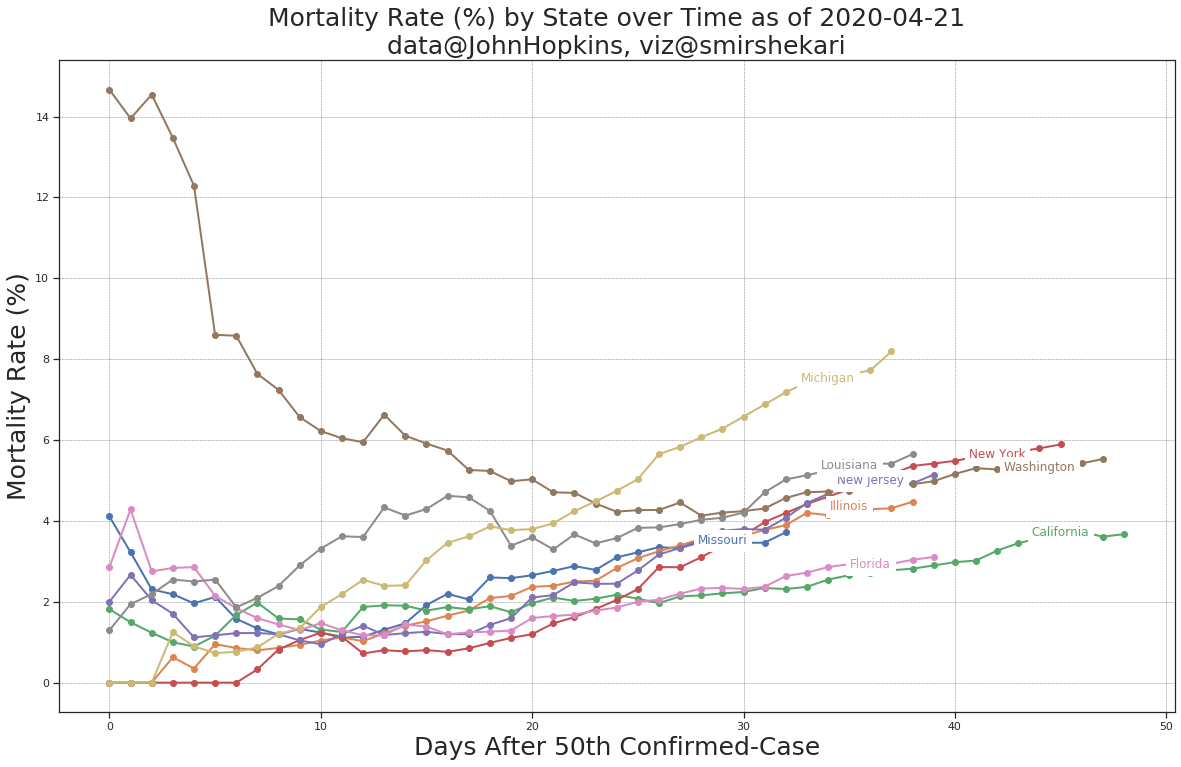

In [16]:
X_AXIS = 'days_after_threshold'
Y_AXIS = 'dead_by_confirmed'

df = data_frames_indexed
df = df.dropna()

fig = plt.figure(figsize=(20, 12))
plt.xticks(rotation=0)

plt.title(labels_dic[Y_AXIS]+ ' by State over Time as of '+ str(last_date.date())+ '\n'+ title_note, size= 25)
plt.ylabel(labels_dic[Y_AXIS], size= 25)
plt.xlabel(labels_dic[X_AXIS], size= 25)

plt.grid(color='gray', linestyle='--', linewidth=.5)
#################

xvals = []
for state in state_list:
    X = df.loc[df['state']==state, X_AXIS].astype('float')
    Y = df.loc[df['state']==state, Y_AXIS].astype('float')
    plt.plot(X, Y, 'o-', label=state, linewidth=2)
    label_loc = max(X)-3
    xvals.append(label_loc)
    
lines = plt.gca().get_lines()
labelLines(lines, align=False, xvals=xvals)


plt.show()
fig.savefig('/home/smirs/git_repos/mavad/images/US-States/state_01.jpeg')

## Confirmed Cases

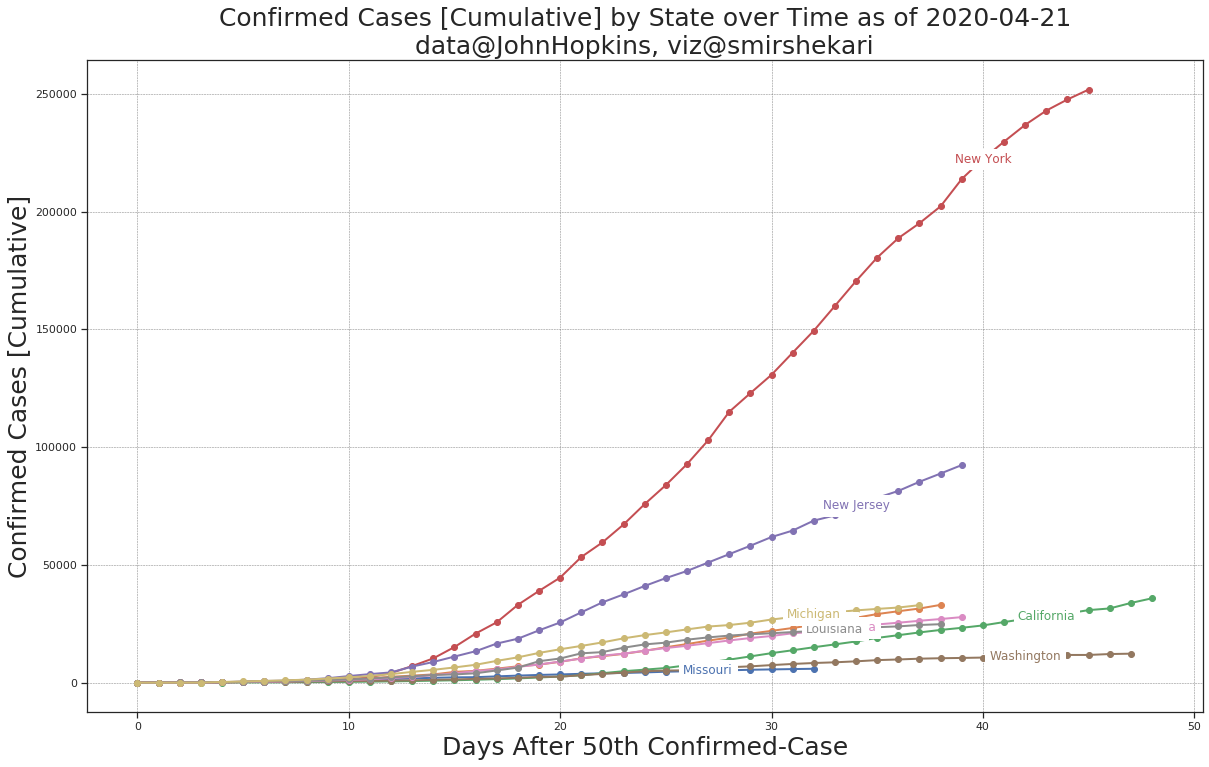

In [17]:
X_AXIS = 'days_after_threshold'
Y_AXIS = 'cases'

df = data_frames_indexed
df = df.dropna()

fig = plt.figure(figsize=(20, 12))
plt.xticks(rotation=0)

plt.title(labels_dic[Y_AXIS]+ ' by State over Time as of '+ str(last_date.date())+ '\n'+ title_note, size= 25)
plt.ylabel(labels_dic[Y_AXIS], size= 25)
plt.xlabel(labels_dic[X_AXIS], size= 25)

# plt.yscale('log')
plt.grid(color='gray', linestyle='--', linewidth=.5)
#################

xvals = []
for state in state_list:
    X = df.loc[df['state']==state, X_AXIS].astype('float')
    Y = df.loc[df['state']==state, Y_AXIS].astype('float')
    plt.plot(X, Y, 'o-', label=state, linewidth=2)
    label_loc = max(X)-5
    xvals.append(label_loc)
    
lines = plt.gca().get_lines()
labelLines(lines, align=False, xvals=xvals)


plt.show()
fig.savefig('/home/smirs/git_repos/mavad/images/US-States/state_02.jpeg')

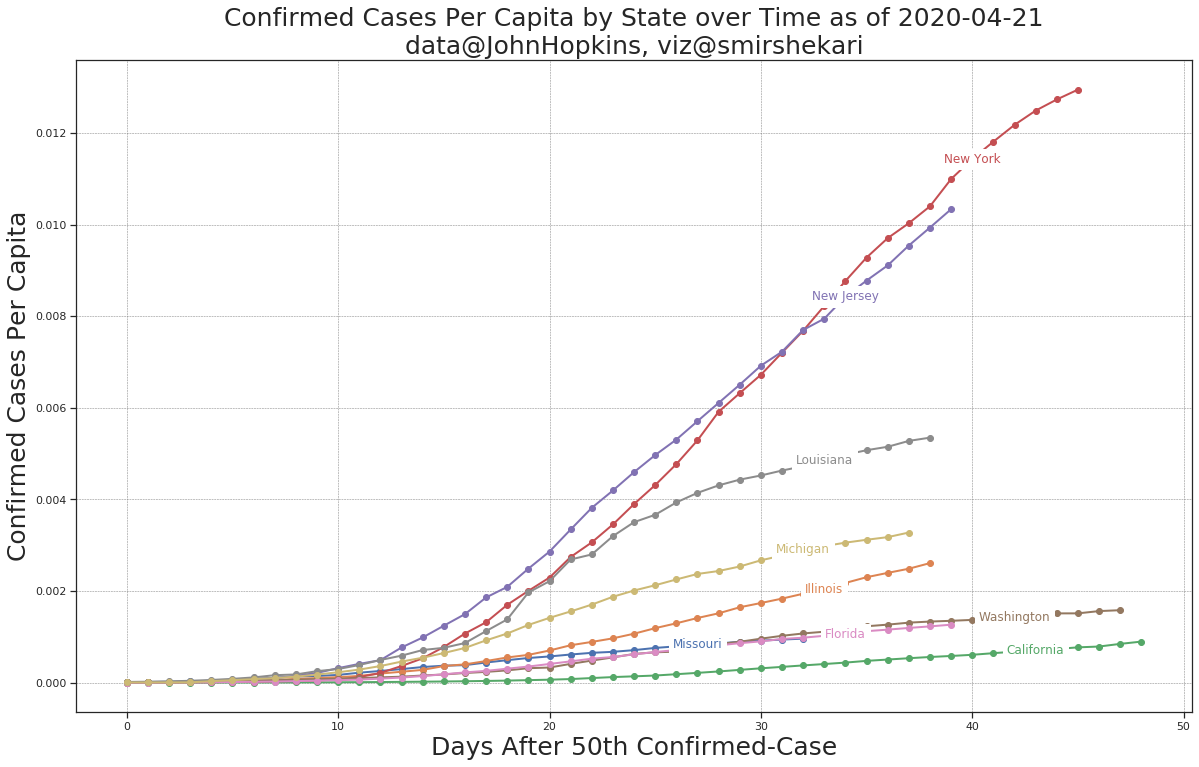

In [18]:
X_AXIS = 'days_after_threshold'
Y_AXIS = 'confirmed_per_capita'

df = data_frames_indexed
df = df.dropna()

fig = plt.figure(figsize=(20, 12))
plt.xticks(rotation=0)

plt.title(labels_dic[Y_AXIS]+ ' by State over Time as of '+ str(last_date.date())+ '\n'+ title_note, size= 25)
plt.ylabel(labels_dic[Y_AXIS], size= 25)
plt.xlabel(labels_dic[X_AXIS], size= 25)

#plt.yscale('log')
plt.grid(color='gray', linestyle='--', linewidth=.5)
#################

xvals = []
for state in state_list:
    X = df.loc[df['state']==state, X_AXIS].astype('float')
    Y = df.loc[df['state']==state, Y_AXIS].astype('float')
    plt.plot(X, Y, 'o-', label=state, linewidth=2)
    label_loc = max(X)-5
    xvals.append(label_loc)
    
lines = plt.gca().get_lines()
labelLines(lines, align=False, xvals=xvals)


plt.show()
fig.savefig('/home/smirs/git_repos/mavad/images/US-States/state_03.jpeg')

## Deaths Cases

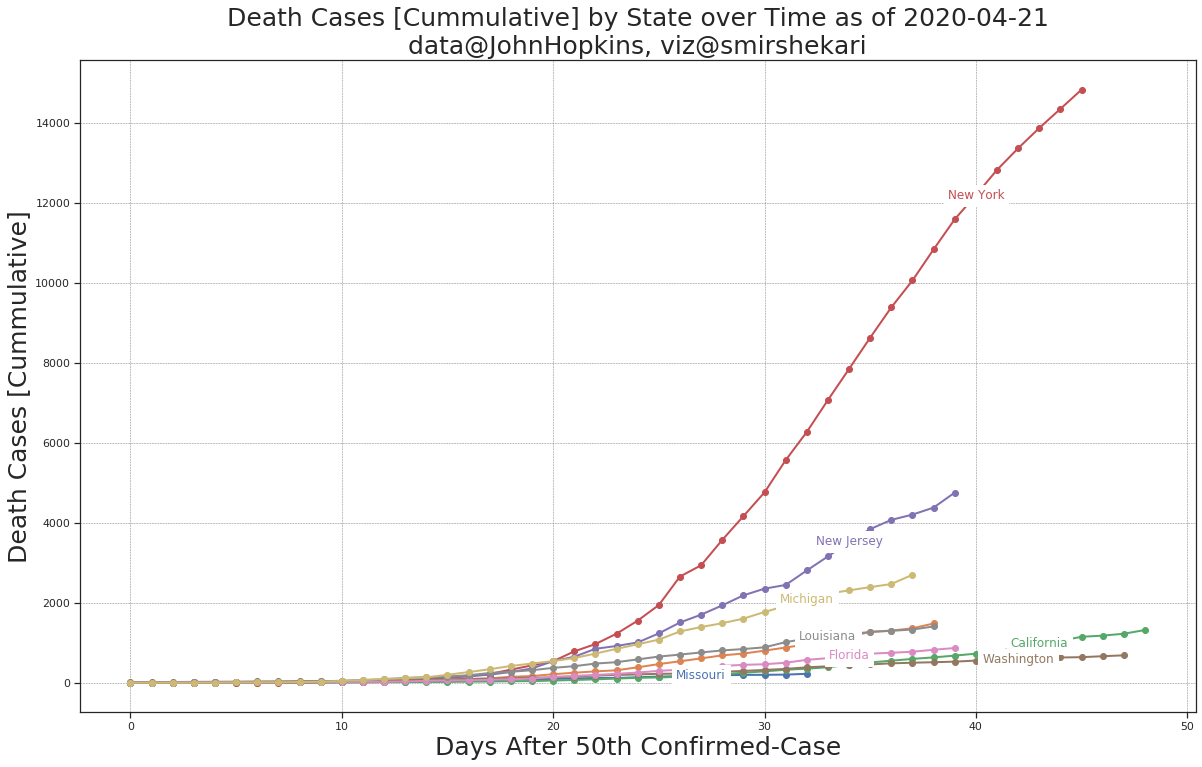

In [19]:
X_AXIS = 'days_after_threshold'
Y_AXIS = 'deaths'

df = data_frames_indexed
df = df.dropna()

fig = plt.figure(figsize=(20, 12))
plt.xticks(rotation=0)

plt.title(labels_dic[Y_AXIS]+ ' by State over Time as of '+ str(last_date.date())+ '\n'+ title_note, size= 25)
plt.ylabel(labels_dic[Y_AXIS], size= 25)
plt.xlabel(labels_dic[X_AXIS], size= 25)

# plt.yscale('log')
plt.grid(color='gray', linestyle='--', linewidth=.5)
#################

xvals = []
for state in state_list:
    X = df.loc[df['state']==state, X_AXIS].astype('float')
    Y = df.loc[df['state']==state, Y_AXIS].astype('float')
    plt.plot(X, Y, 'o-', label=state, linewidth=2)
    label_loc = max(X)-5
    xvals.append(label_loc)
    
lines = plt.gca().get_lines()
labelLines(lines, align=False, xvals=xvals)


plt.show()
fig.savefig('/home/smirs/git_repos/mavad/images/US-States/state_04.jpeg')

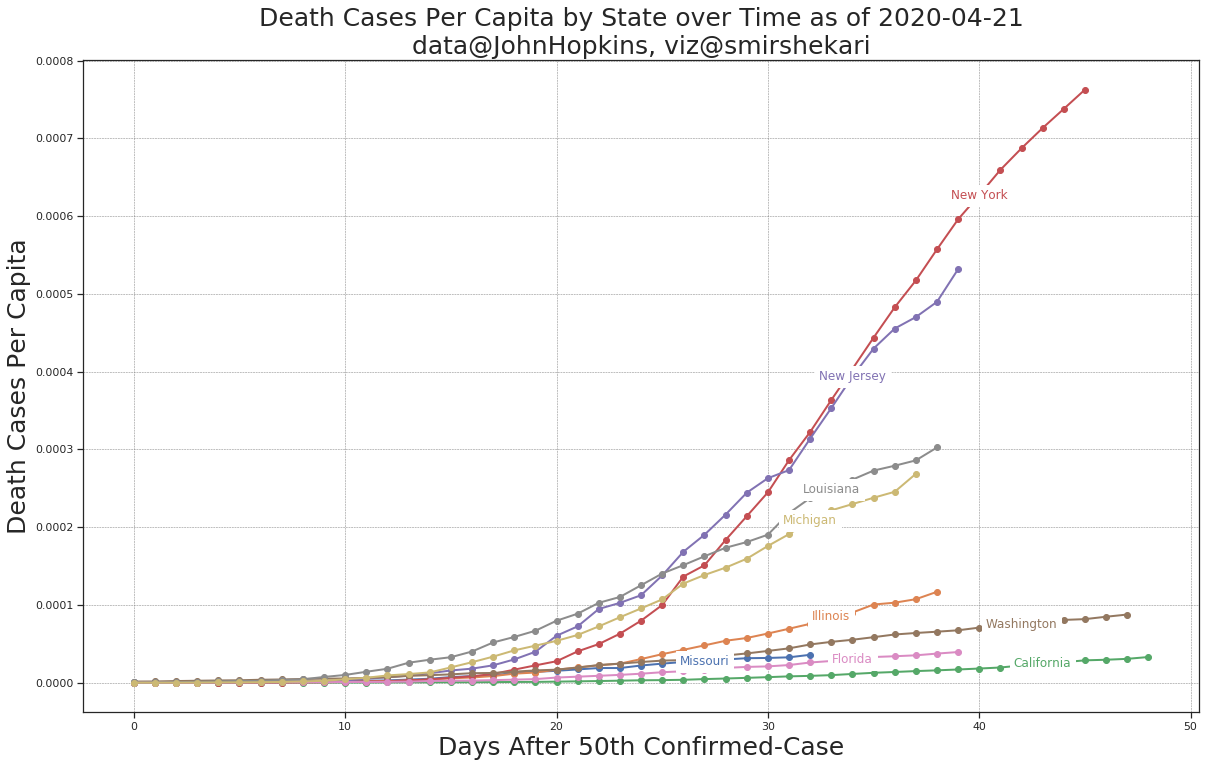

In [20]:
X_AXIS = 'days_after_threshold'
Y_AXIS = 'death_per_capita'

df = data_frames_indexed
df = df.dropna()

fig = plt.figure(figsize=(20, 12))
plt.xticks(rotation=0)

plt.title(labels_dic[Y_AXIS]+ ' by State over Time as of '+ str(last_date.date())+ '\n'+ title_note, size= 25)
plt.ylabel(labels_dic[Y_AXIS], size= 25)
plt.xlabel(labels_dic[X_AXIS], size= 25)

#plt.yscale('log')
plt.grid(color='gray', linestyle='--', linewidth=.5)
#################

xvals = []
for state in state_list:
    X = df.loc[df['state']==state, X_AXIS].astype('float')
    Y = df.loc[df['state']==state, Y_AXIS].astype('float')
    plt.plot(X, Y, 'o-', label=state, linewidth=2)
    label_loc = max(X)-5
    xvals.append(label_loc)
    
lines = plt.gca().get_lines()
labelLines(lines, align=False, xvals=xvals)


plt.show()
fig.savefig('/home/smirs/git_repos/mavad/images/US-States/state_05.jpeg')